In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import sys
import shutil
import pickle

In [79]:
os.path.realpath('')
os.getcwd()
path = os.path.abspath('').split('\\')
path
datapath = '/'.join(path[0:-1])
datapath = datapath+ '/Projects/web_scraping/weather_data.pickle'
datapath

'C:/Users/Shivam Maurya/Python 3/Projects/web_scraping/weather_data.pickle'

In [69]:
for i, j, k in (os.walk(datapath+'/Projects', topdown = True)):
    print(i, j, k)

C:/Users/Shivam Maurya/Python 3/Projects ['.ipynb_checkpoints', 'web_scraping'] []
C:/Users/Shivam Maurya/Python 3/Projects\.ipynb_checkpoints [] []
C:/Users/Shivam Maurya/Python 3/Projects\web_scraping ['.ipynb_checkpoints'] ['dataframe_01.pk', 'tests.ipynb', 'untitled.txt', 'weather_data.pickle', 'web_scraping_01.ipynb', 'web_scraping_02.ipynb', 'web_scraping_03.ipynb', 'web_scraping_04_with_selenium.ipynb']
C:/Users/Shivam Maurya/Python 3/Projects\web_scraping\.ipynb_checkpoints [] ['tests-checkpoint.ipynb', 'web_scraping_01-checkpoint.ipynb', 'web_scraping_02-checkpoint.ipynb', 'web_scraping_03-checkpoint.ipynb', 'web_scraping_04_with_selenium-checkpoint.ipynb']


In [90]:
with open(datapath, 'rb') as file:
    df = pickle.load(file)

In [98]:
df.index = pd.to_datetime(df.index, format = '%Y-%d-%m')

In [104]:
df.head()

,Average_temperature °F,Average_humidity %,Average_dewpoint °F,Average_barometer in.,Average_windspeed mph,Average_gustspeed mph,Average_direction ° ( W ),Rainfall_for_month in.,Rainfall_for_year in.,Maximum_rain_per_minute in.,Maximum_temperature °F,Minimum_temperature °F,Maximum_humidity %,Minimum_humidity %,Maximum_pressure in.,Minimum_pressure in.,Maximum_windspeed mph,Maximum_gust_speed mph,Maximum_heat_index °F
2009-01-01,37.8,35,12.7,29.7,26.4,36.8,274,0.0,0.0,0.0,40.1,34.5,44,27,29.762,29.596,41.4,59.0,40.1
2009-01-02,43.2,32,14.7,29.5,12.8,18.0,240,0.0,0.0,0.0,52.8,37.5,43,16,29.669,29.268,35.7,51.0,52.8
2009-01-03,25.7,60,12.7,29.7,8.3,12.2,290,0.0,0.0,0.0,41.2,6.7,89,35,30.232,29.260,25.3,38.0,41.2
2009-01-04,9.3,67,0.1,30.4,2.9,4.5,47,0.0,0.0,0.0,19.4,-0.0,79,35,30.566,30.227,12.7,20.0,32.0
2009-01-05,23.5,30,-5.0,29.9,16.7,23.1,265,0.0,0.0,0.0,30.3,15.1,56,13,30.233,29.568,38.0,53.0,32.0


### Draw a box plot on the  average_temperature column across each year.
    - use seaborn.boxplot()
    - set the height and width to 8 and 15 repectively.
    - assign the plot object to variable plot1.
### Expected plot
<img src="sns_plots/box_plot.png">

In [177]:
plt.style.use('bmh')
plt.rcdefaults()

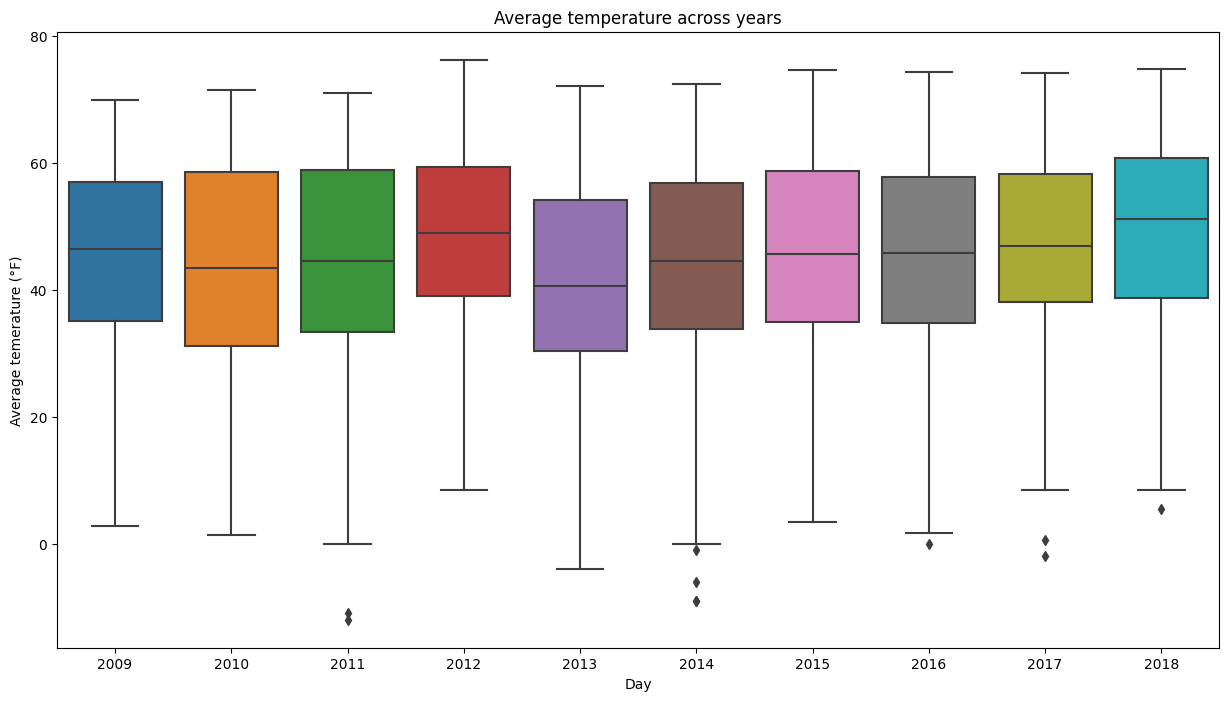

In [190]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
sns.boxplot(data = df, x = df.index.year, y = df['Average_temperature °F'])
ax.set(title = 'Average temperature across years', xlabel = 'Day', ylabel = 'Average temerature (°F)')
plt.margins(tight = True)
plt.show()

### Draw correlation heatmap for all the available features.
    - 10*10
    - make sure the correlation values are annoted for each combination of features.
    - assign the plot object to variable plot2
### Expected plot
<img src="sns_plots/corr_plot.png">

In [186]:
corr_df = df.corr()
corr_df.head()

,Average_temperature °F,Average_humidity %,Average_dewpoint °F,Average_barometer in.,Average_windspeed mph,Average_gustspeed mph,Average_direction ° ( W ),Rainfall_for_month in.,Rainfall_for_year in.,Maximum_rain_per_minute in.,Maximum_temperature °F,Minimum_temperature °F,Maximum_humidity %,Minimum_humidity %,Maximum_pressure in.,Minimum_pressure in.,Maximum_windspeed mph,Maximum_gust_speed mph,Maximum_heat_index °F
Average_temperature °F,1.000000,-0.246946,0.759403,-0.560991,-0.167565,0.007562,0.062565,0.303459,0.189240,0.056010,0.962998,0.917580,0.024434,-0.406654,-0.626706,-0.215368,-0.036854,0.017621,0.955742
Average_humidity %,-0.246946,1.000000,0.423144,0.192791,-0.513740,-0.182189,-0.334694,0.237733,0.022077,0.309959,-0.217483,-0.160359,0.783566,0.810331,0.193938,0.077371,-0.305960,-0.103986,-0.189732
Average_dewpoint °F,0.759403,0.423144,1.000000,-0.395288,-0.456448,-0.098161,-0.144434,0.439681,0.193052,0.255337,0.735794,0.755026,0.538219,0.153825,-0.462194,-0.147113,-0.219008,-0.047867,0.751279
Average_barometer in.,-0.560991,0.192791,-0.395288,1.000000,-0.125732,-0.065835,-0.158622,-0.141795,0.006680,-0.020518,-0.470392,-0.585755,0.004196,0.229991,0.937125,0.560756,-0.123541,-0.035328,-0.462492
Average_windspeed mph,-0.167565,-0.513740,-0.456448,-0.125732,1.000000,0.371001,0.307075,-0.206523,-0.106618,-0.156237,-0.280200,-0.054117,-0.547795,-0.240992,-0.112342,-0.085513,0.539209,0.239519,-0.289329


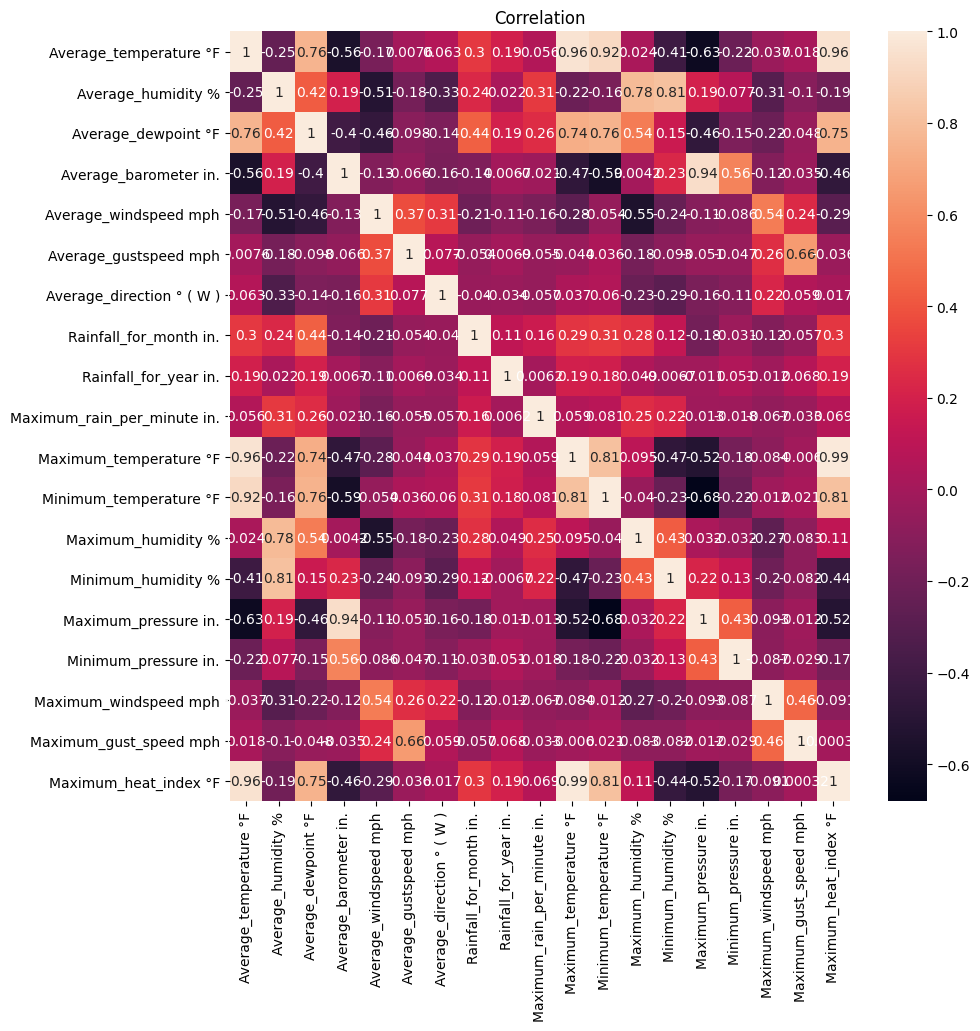

In [189]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.set(title = 'Correlation')
sns.heatmap(data = corr_df, annot = True)
plt.margins(tight = True)
plt.show()

Draw a distribution plot using seaborn for average_temperature column.
   - set bins to 20
   - set the height and width to 8,8.
   - assign the plot object to plot3 variable

### Expected plot
<img src="sns_plots/hist_plot.png">

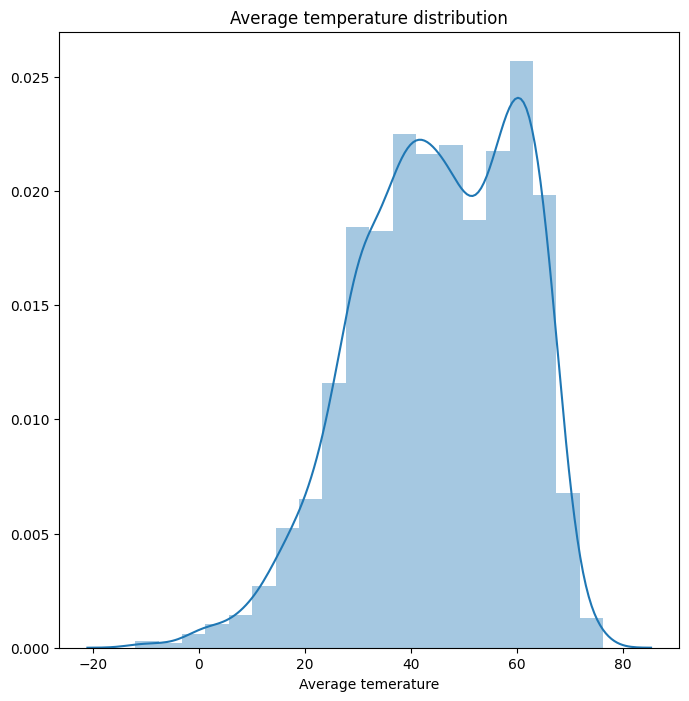

In [207]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
sns.distplot(x = df['Average_temperature °F'], bins = 20, kde = True)
ax.set(title = 'Average temperature distribution', xlabel = 'Average temerature', ylabel = '')
plt.margins(tight = True)
plt.show()

### Draw seaborn violin plot on mximum_pressure column.
    - set gridsize to 100
    - set figsize to 8,8
    - assign the plot object to variable plot4

### Expected plot
<img src="sns_plots/violin_plot.png">

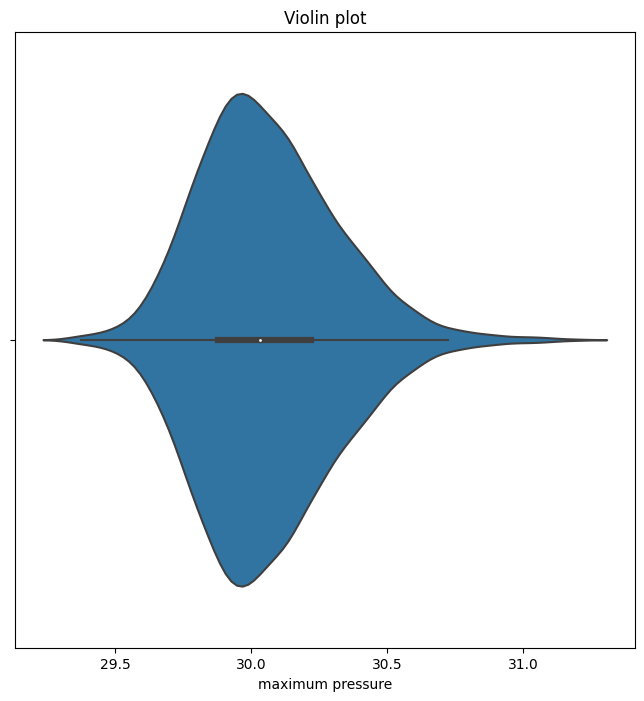

In [222]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
sns.violinplot(x = df['Maximum_pressure in.'], gridsize = 100)
ax.set(title = 'Violin plot', xlabel = 'maximum pressure')
plt.margins(tight = True)
plt.show()

In [ ]:
import pickle
with open("plot1.pickle", "wb") as file:
    pickle.dump(plot1, file)

with open("plot2.pickle", "wb") as file:
    pickle.dump(plot2, file)

with open("plot3.pickle", "wb") as file:
    pickle.dump(plot3, file)

with open("plot4.pickle", "wb") as file:
    pickle.dump(plot4, file)